In [1]:
def mark(array, X, Y, direction, length):
    for i in range(length):
        if direction == 'left':
            array[X - i, Y] = 1
        elif direction == 'right':
            array[X + i, Y] = 1
        elif direction == 'lower':
            array[X, Y - i] = 1
        elif direction == 'upper':
            array[X, Y + i] = 1
        else:
            raise Exception()

In [2]:
from itertools import combinations, permutations
directions = ('left', 'right', 'lower', 'upper')
cruxes = tuple(combinations(directions, 2))

In [3]:
import numpy as np
def generate_data(scale):
    data = []
    points = ((4, 4), (13, 4), (4, 13), (13, 13))
    for p in permutations(range(6), 4):
        canvas = np.zeros((18, 18))
        for index, point in zip(p, points):
            X, Y = point
            r, s = cruxes[index]
            mark(canvas, X, Y, r, scale)
            mark(canvas, X, Y, s, scale)
        data.append(canvas)
    return np.array(data)
def generate_dataset(scale):
    data = generate_data(scale)
    labels = np.arange(len(data))
    return data, labels

In [4]:
from joblib import dump, load
for scale in (3, 5):
    dump(generate_dataset(scale), 'quad-%d' % scale)

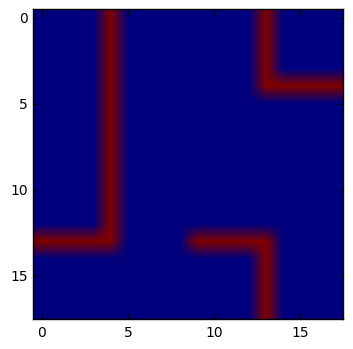

In [5]:
import matplotlib.pylab as pl
%matplotlib inline
data, labels = load('quad-5')
index = 0
pl.imshow(data[index])